

# ICS 435 Homework 1: Kyler Okuma

# Dataset:
Use the Breast Cancer dataset provided by sklearn. It includes 30 features and a binary
classification task (malignant vs. benign). 

# Data Preprocessing

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset using load_breast_cancer from sklearn.
data = load_breast_cancer()
X = data['data']
y = data['target']

# Partition the data into an 80% training set and a 20% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Fixed seed

# Scale the features using StandardScaler for KNN.
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Number of samples in training set: {X_train_scaled.shape[0]}")
print(f"Number of features: {X_train_scaled.shape[1]}")





Number of samples in training set: 455
Number of features: 30


# Model Training

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train three classifiers:

# K-Nearest Neighbors (KNN): Start with n_neighbors=5.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Decision Tree: Use the default settings initially, then experiment with max_depth.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

dt5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt5.fit(X_train_scaled, y_train)

dt10 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt10.fit(X_train_scaled, y_train)

dt100 = DecisionTreeClassifier(max_depth=100, random_state=42)
dt100.fit(X_train_scaled, y_train)

# Random Forest: Start with 100 trees (n_estimators=100) and explore the effect of different max_depth or min_samples_split.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

rfd5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfd5.fit(X_train_scaled, y_train)

rfd10 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfd10.fit(X_train_scaled, y_train)

rfd100 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)
rfd100.fit(X_train_scaled, y_train)

rfmss5 = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=42)
rfmss5.fit(X_train_scaled, y_train)

rfmss10 = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=42)
rfmss10.fit(X_train_scaled, y_train)

rfmss100 = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)
rfmss100.fit(X_train_scaled, y_train)

print('test')  


test


# Evaluation

Model: KNN
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-Score: 0.9577

Model: Decision Tree
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-Score: 0.9577

Model: Random Forest
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-Score: 0.9722


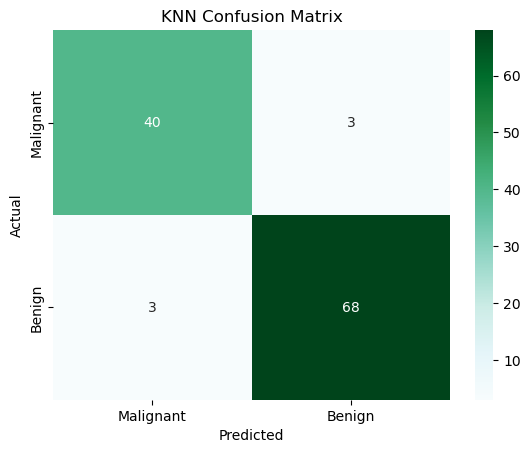

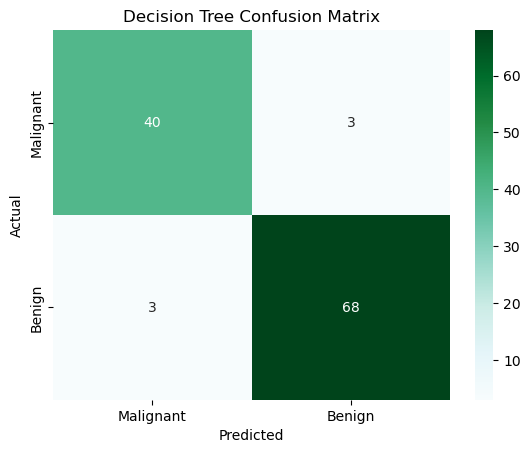

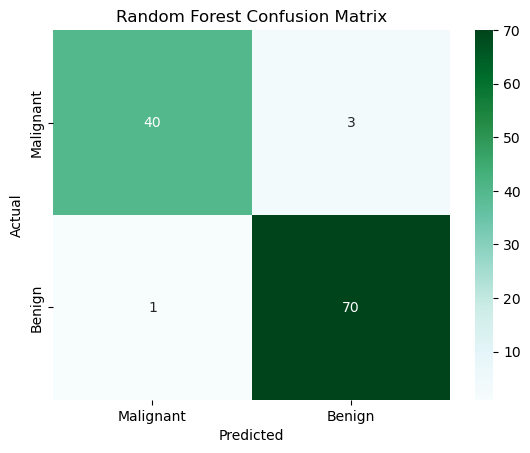

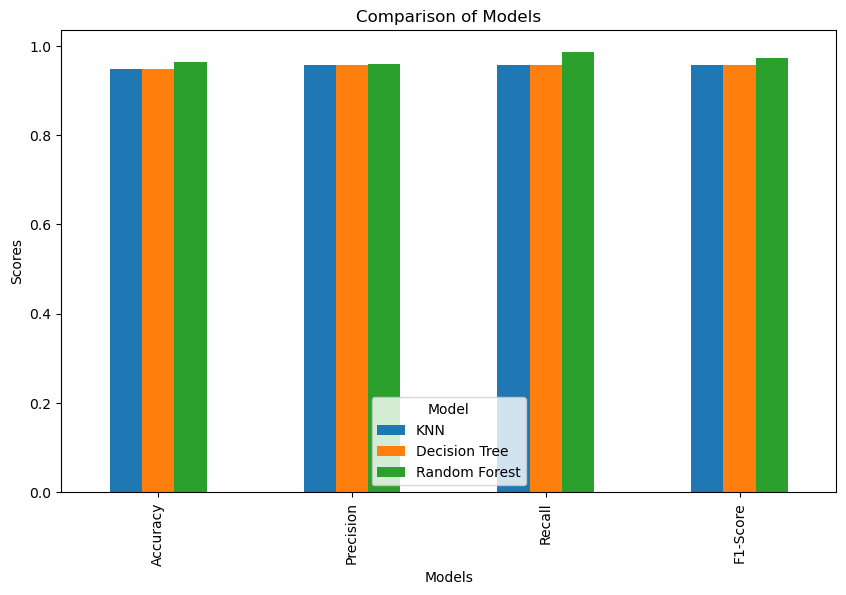

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predictions for each model
knn_pred = knn.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)

# Use the following metrics to evaluate performance:

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Precision 
knn_precision = precision_score(y_test, knn_pred)
dt_precision = precision_score(y_test, dt_pred)
rf_precision = precision_score(y_test, rf_pred)

# Recall
knn_recall = recall_score(y_test, knn_pred)
dt_recall = recall_score(y_test, dt_pred)
rf_recall = recall_score(y_test, rf_pred)

# F1-score
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Print scores 
print(f'Model: KNN')
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')
print(f'F1-Score: {knn_f1:.4f}\n')

print(f'Model: Decision Tree')
print(f'Accuracy: {dt_accuracy:.4f}')
print(f'Precision: {dt_precision:.4f}')
print(f'Recall: {dt_recall:.4f}')
print(f'F1-Score: {dt_f1:.4f}\n')

print(f'Model: Random Forest')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')
print(f'F1-Score: {rf_f1:.4f}')

# Include a confusion matrix for each model
knn_confmax = confusion_matrix(y_test, knn_pred)
dt_confmax = confusion_matrix(y_test, dt_pred)
rf_confmax = confusion_matrix(y_test, rf_pred)

# Plot confusion matrices for each model
labels = ['Malignant', 'Benign']

sns.heatmap(knn_confmax, annot=True, cmap='BuGn', xticklabels=labels, yticklabels=labels)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(dt_confmax, annot=True, cmap='BuGn', xticklabels=labels, yticklabels=labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(rf_confmax, annot=True, cmap='BuGn', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare the results across the models in a tabular or graphical format.
models = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Create dataframe for simplicity of the plot.
comparison_plot_df = pd.DataFrame({
    'Model': models,
    'KNN': knn_scores,
    'Decision Tree': dt_scores,
    'Random Forest': rf_scores
})

comparison_plot_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Models')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.legend(title='Model')
plt.show()

# Ablation Study

In [193]:
# Modify key hyperparameters (e.g., n_neighbors for KNN, max_depth for Decision Trees and Random Forest) and observe the impact on performance.

# Test n_neighbors at 10 and 100 for KNN Classifier.
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train_scaled, y_train)

knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train_scaled, y_train)

knn10_pred = knn10.predict(X_test_scaled)
knn100_pred = knn100.predict(X_test_scaled)

knn10_accuracy = accuracy_score(y_test, knn10_pred)
knn10_precision = precision_score(y_test, knn10_pred)
knn10_recall = recall_score(y_test, knn10_pred)
knn10_f1 = f1_score(y_test, knn10_pred)

knn100_accuracy = accuracy_score(y_test, knn100_pred)
knn100_precision = precision_score(y_test, knn100_pred)
knn100_recall = recall_score(y_test, knn100_pred)
knn100_f1 = f1_score(y_test, knn100_pred)

print(f'Model: KNN (n_neighbors = 10)')
print(f'Accuracy: {knn10_accuracy:.4f}')
print(f'Precision: {knn10_precision:.4f}')
print(f'Recall: {knn10_recall:.4f}')
print(f'F1-Score: {knn10_f1:.4f}\n')

print(f'Model: KNN (n_neighbors = 100)')
print(f'Accuracy: {knn100_accuracy:.4f}')
print(f'Precision: {knn100_precision:.4f}')
print(f'Recall: {knn100_recall:.4f}')
print(f'F1-Score: {knn100_f1:.4f}\n')

# Test max_depth at 5, 10, and 100 for Decision Tree.
dt5_pred = dt5.predict(X_test_scaled)
dt10_pred = dt10.predict(X_test_scaled)
dt100_pred = dt100.predict(X_test_scaled)

dt5_accuracy = accuracy_score(y_test, dt5_pred)
dt5_precision = precision_score(y_test, dt5_pred)
dt5_recall = recall_score(y_test, dt5_pred)
dt5_f1 = f1_score(y_test, dt5_pred)

dt10_accuracy = accuracy_score(y_test, dt10_pred)
dt10_precision = precision_score(y_test, dt10_pred)
dt10_recall = recall_score(y_test, dt10_pred)
dt10_f1 = f1_score(y_test, dt10_pred)

dt100_accuracy = accuracy_score(y_test, dt100_pred)
dt100_precision = precision_score(y_test, dt100_pred)
dt100_recall = recall_score(y_test, dt100_pred)
dt100_f1 = f1_score(y_test, dt100_pred)

print(f'Model: Decision Tree (max_depth = 5)')
print(f'Accuracy: {dt5_accuracy:.4f}')
print(f'Precision: {dt5_precision:.4f}')
print(f'Recall: {dt5_recall:.4f}')
print(f'F1-Score: {dt5_f1:.4f}\n')

print(f'Model: Decision Tree (max_depth = 10)')
print(f'Accuracy: {dt10_accuracy:.4f}')
print(f'Precision: {dt10_precision:.4f}')
print(f'Recall: {dt10_recall:.4f}')
print(f'F1-Score: {dt10_f1:.4f}\n')

print(f'Model: Decision Tree (max_depth = 100)')
print(f'Accuracy: {dt100_accuracy:.4f}')
print(f'Precision: {dt100_precision:.4f}')
print(f'Recall: {dt100_recall:.4f}')
print(f'F1-Score: {dt100_f1:.4f}\n')

# Test max_depth at 5, 10, and 100 for Random Forest.
rfd5_pred = rfd5.predict(X_test_scaled)
rfd10_pred = rfd10.predict(X_test_scaled)
rfd100_pred = rfd100.predict(X_test_scaled)

rfd5_accuracy = accuracy_score(y_test, rfd5_pred)
rfd5_precision = precision_score(y_test, rfd5_pred)
rfd5_recall = recall_score(y_test, rfd5_pred)
rfd5_f1 = f1_score(y_test, rfd5_pred)

rfd10_accuracy = accuracy_score(y_test, rfd10_pred)
rfd10_precision = precision_score(y_test, rfd10_pred)
rfd10_recall = recall_score(y_test, rfd10_pred)
rfd10_f1 = f1_score(y_test, rfd10_pred)

rfd100_accuracy = accuracy_score(y_test, rfd100_pred)
rfd100_precision = precision_score(y_test, rfd100_pred)
rfd100_recall = recall_score(y_test, rfd100_pred)
rfd100_f1 = f1_score(y_test, rfd100_pred)

print(f'Model: Random Forest (max_depth = 5)')
print(f'Accuracy: {rfd5_accuracy:.4f}')
print(f'Precision: {rfd5_precision:.4f}')
print(f'Recall: {rfd5_recall:.4f}')
print(f'F1-Score: {rfd5_f1:.4f}\n')

print(f'Model: Random Forest (max_depth = 10)')
print(f'Accuracy: {rfd10_accuracy:.4f}')
print(f'Precision: {rfd10_precision:.4f}')
print(f'Recall: {rfd10_recall:.4f}')
print(f'F1-Score: {rfd10_f1:.4f}\n')

print(f'Model: Random Forest (max_depth = 100)')
print(f'Accuracy: {rfd100_accuracy:.4f}')
print(f'Precision: {rfd100_precision:.4f}')
print(f'Recall: {rfd100_recall:.4f}')
print(f'F1-Score: {rfd100_f1:.4f}\n')

# Test min_samples_split at 5, 10, and 100 for Random Forest.
rfmss5_pred = rfmss5.predict(X_test_scaled)
rfmss10_pred = rfmss10.predict(X_test_scaled)
rfmss100_pred = rfmss100.predict(X_test_scaled)

rfmss5_accuracy = accuracy_score(y_test, rfmss5_pred)
rfmss5_precision = precision_score(y_test, rfmss5_pred)
rfmss5_recall = recall_score(y_test, rfmss5_pred)
rfmss5_f1 = f1_score(y_test, rfmss5_pred)

rfmss10_accuracy = accuracy_score(y_test, rfmss10_pred)
rfmss10_precision = precision_score(y_test, rfmss10_pred)
rfmss10_recall = recall_score(y_test, rfmss10_pred)
rfmss10_f1 = f1_score(y_test, rfmss10_pred)

rfmss100_accuracy = accuracy_score(y_test, rfmss100_pred)
rfmss100_precision = precision_score(y_test, rfmss100_pred)
rfmss100_recall = recall_score(y_test, rfmss100_pred)
rfmss100_f1 = f1_score(y_test, rfmss100_pred)

# Print results
print(f'Model: Random Forest (min_samples_split = 5)')
print(f'Accuracy: {rfmss5_accuracy:.4f}')
print(f'Precision: {rfmss5_precision:.4f}')
print(f'Recall: {rfmss5_recall:.4f}')
print(f'F1-Score: {rfmss5_f1:.4f}\n')

print(f'Model: Random Forest (min_samples_split = 10)')
print(f'Accuracy: {rfmss10_accuracy:.4f}')
print(f'Precision: {rfmss10_precision:.4f}')
print(f'Recall: {rfmss10_recall:.4f}')
print(f'F1-Score: {rfmss10_f1:.4f}\n')

print(f'Model: Random Forest (min_samples_split = 100)')
print(f'Accuracy: {rfmss100_accuracy:.4f}')
print(f'Precision: {rfmss100_precision:.4f}')
print(f'Recall: {rfmss100_recall:.4f}')
print(f'F1-Score: {rfmss100_f1:.4f}\n')


Model: KNN (n_neighbors = 10)
Accuracy: 0.9561
Precision: 0.9714
Recall: 0.9577
F1-Score: 0.9645

Model: KNN (n_neighbors = 100)
Accuracy: 0.9474
Precision: 0.9221
Recall: 1.0000
F1-Score: 0.9595

Model: Decision Tree (max_depth = 5)
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-Score: 0.9577

Model: Decision Tree (max_depth = 10)
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-Score: 0.9577

Model: Decision Tree (max_depth = 100)
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-Score: 0.9577

Model: Random Forest (max_depth = 5)
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-Score: 0.9722

Model: Random Forest (max_depth = 10)
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-Score: 0.9722

Model: Random Forest (max_depth = 100)
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-Score: 0.9722

Model: Random Forest (min_samples_split = 5)
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-Score: 0.9722

Model: Random Forest (min_samples_split = 10)
Accuracy